<h3>Imports and Setup</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
big_table = pd.read_csv('data/T_T100_SEGMENT_ALL_CARRIER.csv')
area_codes_table = pd.read_csv('data/L_WORLD_AREA_CODES.csv')
carrier_classes = pd.read_csv('data/L_CARRIER_GROUP_NEW.csv')

In [4]:
# Replace World Area Codes (WAC) with descriptions from lookup table
big_table = big_table.merge(area_codes_table, left_on='DEST_WAC', right_on='Code', how='left')
big_table['DEST_WAC'] = big_table['Description']
big_table['ORIGIN_WAC'] = big_table['Description']
big_table = big_table.drop(columns=['Code', 'Description'])

In [5]:
big_table

,DEPARTURES_SCHEDULED,DEPARTURES_PERFORMED,PAYLOAD,SEATS,PASSENGERS,FREIGHT,MAIL,DISTANCE,RAMP_TO_RAMP,AIR_TIME,UNIQUE_CARRIER,UNIQUE_CARRIER_NAME,REGION,CARRIER,CARRIER_NAME,CARRIER_GROUP_NEW,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,ORIGIN_COUNTRY_NAME,ORIGIN_WAC,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_NM,DEST_COUNTRY_NAME,DEST_WAC,AIRCRAFT_GROUP,AIRCRAFT_TYPE,AIRCRAFT_CONFIG,YEAR,QUARTER,MONTH,DISTANCE_GROUP,CLASS,DATA_SOURCE
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,NEW,New England Airlines Inc.,D,NEW,New England Airlines Inc.,6,30613,BID,"Block Island, RI",Rhode Island,United States,Rhode Island,35855,WST,"Westerly, RI",Rhode Island,United States,Rhode Island,0,79,1,2024,1,1,1,F,DU
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,NEW,New England Airlines Inc.,D,NEW,New England Airlines Inc.,6,30613,BID,"Block Island, RI",Rhode Island,United States,Rhode Island,35855,WST,"Westerly, RI",Rhode Island,United States,Rhode Island,0,79,1,2024,3,7,1,F,DU
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,NEW,New England Airlines Inc.,D,NEW,New England Airlines Inc.,6,35855,WST,"Westerly, RI",Rhode Island,United States,Rhode Island,30613,BID,"Block Island, RI",Rhode Island,United States,Rhode Island,0,79,1,2024,1,1,1,F,DU
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,NEW,New England Airlines Inc.,D,NEW,New England Airlines Inc.,6,35855,WST,"Westerly, RI",Rhode Island,United States,Rhode Island,30613,BID,"Block Island, RI",Rhode Island,United States,Rhode Island,0,79,1,2024,3,7,1,F,DU
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,0.0,0.0,9K,Cape Air,D,9K,Cape Air,6,33541,MVY,"Martha's Vineyard, MA",Massachusetts,United States,Massachusetts,32250,HYA,"Hyannis, MA",Massachusetts,United States,Massachusetts,1,125,1,2024,1,1,1,F,DU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314502,891.0,889.0,2367000.0,8002.0,4689.0,5250.0,0.0,59.0,33895.0,26497.0,GV,Grant Aviation,D,GV,Grant Aviation,5,31555,ENA,"Kenai, AK",Alaska,United States,Alaska,30299,ANC,"Anchorage, AK",Alaska,United States,Alaska,4,416,1,2024,2,6,1,F,DU
314503,995.0,994.0,2737200.0,8946.0,7247.0,10718.0,0.0,59.0,37921.0,27463.0,GV,Grant Aviation,D,GV,Grant Aviation,5,30299,ANC,"Anchorage, AK",Alaska,United States,Alaska,31555,ENA,"Kenai, AK",Alaska,United States,Alaska,4,416,1,2024,3,7,1,F,DU
314504,999.0,998.0,2748200.0,8991.0,6631.0,5663.0,0.0,59.0,39218.0,30137.0,GV,Grant Aviation,D,GV,Grant Aviation,5,31555,ENA,"Kenai, AK",Alaska,United States,Alaska,30299,ANC,"Anchorage, AK",Alaska,United States,Alaska,4,416,1,2024,3,7,1,F,DU
314505,1522.0,1522.0,1826400.0,8026.0,5084.0,10340.0,0.0,11.0,17768.0,13202.0,S2,Star Marianas Air Inc.,D,S2,Star Marianas Air Inc.,6,35215,TIQ,"Tinian, TT",U.S. Pacific Trust Territories and Possessions,United States,U.S. Pacific Trust Territories and Possessions,34955,SPN,"Saipan, TT",U.S. Pacific Trust Territories and Possessions,United States,U.S. Pacific Trust Territories and Possessions,0,79,1,2024,3,7,1,F,DU


<h3>Filter Major Carriers</h3>

In [6]:
carrier_classes

,Code,Description
0,0,Foreign Carriers
1,1,Large Regional Carriers (carriers with annual ...
2,2,National Carriers (carriers with annual revenu...
3,3,Major Carriers (carriers with annual revenue o...
4,4,Medium Regional Carriers (carriers with annual...
5,5,Small Certificated Carriers (carrier holding c...
6,6,Commuter Carriers (air taxi operator which per...
7,7,All Cargo Carriers operating under cerificates...
8,9,Commuter Carriers (Air Taxi providing Essentia...


In [7]:
# Filter only major carriers (TranStats category 3)
major_carriers = big_table.loc[big_table['CARRIER_GROUP_NEW'] == 3]
major_carriers['CARRIER_NAME'].unique()

array(['Delta Air Lines Inc.', 'USA Jet Airlines Inc.',
       'United Air Lines Inc.', 'Republic Airline', 'JetBlue Airways',
       'Hawaiian Airlines Inc.', 'Allegiant Air', 'Alaska Airlines Inc.',
       'Southwest Airlines Co.', 'American Airlines Inc.',
       'Sun Country Airlines d/b/a MN Airlines', 'Atlas Air Inc.',
       'Federal Express Corporation', 'Polar Air Cargo Airways',
       'Kalitta Air LLC', 'Spirit Air Lines', 'SkyWest Airlines Inc.',
       'Envoy Air', 'Frontier Airlines Inc.', 'United Parcel Service'],
      dtype=object)

In [8]:
# Filter passenger flights only
major_passenger_flights = major_carriers.loc[major_carriers['PASSENGERS'] > 0]
major_passenger_flights['CARRIER_NAME'].unique()

array(['United Air Lines Inc.', 'Republic Airline', 'JetBlue Airways',
       'Delta Air Lines Inc.', 'Hawaiian Airlines Inc.', 'Allegiant Air',
       'Alaska Airlines Inc.', 'Southwest Airlines Co.',
       'American Airlines Inc.', 'Sun Country Airlines d/b/a MN Airlines',
       'Atlas Air Inc.', 'SkyWest Airlines Inc.', 'Envoy Air',
       'Spirit Air Lines', 'Frontier Airlines Inc.'], dtype=object)

In [9]:
# Filter flights performed
major_passenger_flights = major_passenger_flights[major_passenger_flights['DEPARTURES_PERFORMED'] > 10]
# Add load factor metric
major_passenger_flights['LF'] = major_passenger_flights['PASSENGERS']/major_passenger_flights['SEATS']

<h3>Sort Domestic & International Flights</h3>

In [10]:
# Helper function to return only domestic or only international flights
def filter_international_flights(df, dom_only=False, int_only=False):
    if dom_only == True:
        df = df[(df['ORIGIN_COUNTRY_NAME'] == 'United States') & (df['DEST_COUNTRY_NAME'] == 'United States')]
    if int_only == True:
        df = df[(df['ORIGIN_COUNTRY_NAME'] != 'United States') | (df['DEST_COUNTRY_NAME'] != 'United States')]
    return df

In [11]:
# Filter domestic routes
dom_flights = filter_international_flights(major_passenger_flights, True)
# Filter international routes
int_flights = filter_international_flights(major_passenger_flights, False, True)

In [12]:
# Lamda function to categorize flights as domestic/international
major_passenger_flights['DOMESTIC'] = major_passenger_flights.apply(lambda row: 'D' if row['ORIGIN_COUNTRY_NAME'] == 'United States' and row['DEST_COUNTRY_NAME'] == 'United States' else 'I', axis=1)

<h3>Load Factor Analysis</h3>

<h6>Best LF overall</h6>

In [13]:
# Select and order relevant columns
mpf_abbrv = major_passenger_flights.loc[:, ['ORIGIN', 'DEST', 'CARRIER_NAME', 'DEPARTURES_PERFORMED', 'SEATS', 'PASSENGERS', 'LF', 'DISTANCE']]
# Sort individual carrier routes by load factor
mpf_abbrv.sort_values(by='LF', ascending=False)

,ORIGIN,DEST,CARRIER_NAME,DEPARTURES_PERFORMED,SEATS,PASSENGERS,LF,DISTANCE
196194,BWI,IAH,Spirit Air Lines,12.0,2184.0,2194.0,1.004579,1235.0
192571,BDL,CLT,American Airlines Inc.,11.0,1408.0,1403.0,0.996449,644.0
203111,LAS,BUF,Southwest Airlines Co.,14.0,2002.0,1990.0,0.994006,1986.0
197289,PUJ,BWI,Southwest Airlines Co.,12.0,2100.0,2082.0,0.991429,1504.0
195573,FCA,ORD,United Air Lines Inc.,12.0,1512.0,1498.0,0.990741,1352.0
...,...,...,...,...,...,...,...,...
202524,SLC,CDC,SkyWest Airlines Inc.,14.0,700.0,81.0,0.115714,221.0
241527,ORD,MCW,SkyWest Airlines Inc.,27.0,1350.0,153.0,0.113333,288.0
205512,LAX,GJT,SkyWest Airlines Inc.,15.0,1020.0,114.0,0.111765,655.0
223572,MCW,ORD,SkyWest Airlines Inc.,21.0,1050.0,112.0,0.106667,288.0


<h6>Best LF domestic routes</h6>

In [14]:
# Select and order specified columns for domestic flights
mpf_dom_abbrv = dom_flights.loc[:, ['ORIGIN', 'DEST', 'CARRIER_NAME', 'DEPARTURES_PERFORMED', 'SEATS', 'PASSENGERS', 'LF', 'DISTANCE']]
# Sort individual carrier routes by load factor
mpf_dom_abbrv.sort_values(by='LF', ascending=False)

,ORIGIN,DEST,CARRIER_NAME,DEPARTURES_PERFORMED,SEATS,PASSENGERS,LF,DISTANCE
196194,BWI,IAH,Spirit Air Lines,12.0,2184.0,2194.0,1.004579,1235.0
192571,BDL,CLT,American Airlines Inc.,11.0,1408.0,1403.0,0.996449,644.0
203111,LAS,BUF,Southwest Airlines Co.,14.0,2002.0,1990.0,0.994006,1986.0
195573,FCA,ORD,United Air Lines Inc.,12.0,1512.0,1498.0,0.990741,1352.0
193814,SLC,BWI,Southwest Airlines Co.,11.0,1925.0,1904.0,0.989091,1865.0
...,...,...,...,...,...,...,...,...
202524,SLC,CDC,SkyWest Airlines Inc.,14.0,700.0,81.0,0.115714,221.0
241527,ORD,MCW,SkyWest Airlines Inc.,27.0,1350.0,153.0,0.113333,288.0
205512,LAX,GJT,SkyWest Airlines Inc.,15.0,1020.0,114.0,0.111765,655.0
223572,MCW,ORD,SkyWest Airlines Inc.,21.0,1050.0,112.0,0.106667,288.0


<h6>Best LF international routes</h6>

In [15]:
# Select and order specified columns for international flights
mpf_int_abbrv = int_flights.loc[:, ['ORIGIN', 'DEST', 'ORIGIN_CITY_NAME', 'DEST_CITY_NAME','CARRIER_NAME', 'DEPARTURES_PERFORMED', 'SEATS', 'PASSENGERS', 'LF', 'DISTANCE']]
# Sort individual carrier routes by load factor
mpf_int_abbrv.sort_values(by='LF', ascending=False)

,ORIGIN,DEST,ORIGIN_CITY_NAME,DEST_CITY_NAME,CARRIER_NAME,DEPARTURES_PERFORMED,SEATS,PASSENGERS,LF,DISTANCE
197289,PUJ,BWI,"Punta Cana, Dominican Republic","Baltimore, MD",Southwest Airlines Co.,12.0,2100.0,2082.0,0.991429,1504.0
242839,SJD,ORD,"San Jose del Cabo, Mexico","Chicago, IL",American Airlines Inc.,27.0,4644.0,4601.0,0.990741,1807.0
261540,PUJ,DFW,"Punta Cana, Dominican Republic","Dallas/Fort Worth, TX",American Airlines Inc.,31.0,5332.0,5274.0,0.989122,2032.0
194163,PUJ,PHL,"Punta Cana, Dominican Republic","Philadelphia, PA",American Airlines Inc.,11.0,2090.0,2063.0,0.987081,1523.0
266694,SXM,CLT,"Philipsburg, Sint Maarten","Charlotte, NC",American Airlines Inc.,33.0,4223.0,4168.0,0.986976,1612.0
...,...,...,...,...,...,...,...,...,...,...
194011,SJU,PUJ,"San Juan, PR","Punta Cana, Dominican Republic",Frontier Airlines Inc.,11.0,2640.0,578.0,0.218939,155.0
249741,JFK,PAP,"New York, NY","Port-au-Prince, Haiti",JetBlue Airways,29.0,4698.0,974.0,0.207322,1522.0
254814,GUM,NGO,"Guam, TT","Nagoya, Japan",United Air Lines Inc.,30.0,4980.0,1009.0,0.202610,1554.0
254986,NGO,GUM,"Nagoya, Japan","Guam, TT",United Air Lines Inc.,30.0,4980.0,1006.0,0.202008,1554.0


<h6>LF by carrier, domestic and international</h6>

In [16]:
# Select SEATS, and PASSENGERS columns and group by airline and region
seats_by_carrier = major_passenger_flights.groupby(['CARRIER_NAME', 'DOMESTIC']).agg({'SEATS': 'sum', 'PASSENGERS': 'sum'}).reset_index()
seats_by_carrier

,CARRIER_NAME,DOMESTIC,SEATS,PASSENGERS
0,Alaska Airlines Inc.,D,20472574.0,16684726.0
1,Alaska Airlines Inc.,I,1381130.0,1170076.0
2,Allegiant Air,D,5719962.0,4914567.0
3,Allegiant Air,I,9672.0,7474.0
4,American Airlines Inc.,D,92758151.0,78243153.0
5,American Airlines Inc.,I,24441271.0,20577909.0
6,Delta Air Lines Inc.,D,90979622.0,78641468.0
7,Delta Air Lines Inc.,I,17826234.0,15223860.0
8,Envoy Air,D,11182937.0,9210164.0
9,Envoy Air,I,947588.0,754339.0


In [17]:
# Pivot to create separate columns for each region and metric
pivoted_regions = seats_by_carrier.pivot_table(index='CARRIER_NAME', columns='DOMESTIC', values=['SEATS', 'PASSENGERS'], fill_value=0)

# Flatten the MultiIndex in columns and rename columns
pivoted_regions.columns = [f'{metric}_{region}' for metric, region in pivoted_regions.columns]

# Reset index to turn CARRIER_NAME back into a column
pivoted_regions = pivoted_regions.reset_index()

# Display the resulting table
pivoted_regions

,CARRIER_NAME,PASSENGERS_D,PASSENGERS_I,SEATS_D,SEATS_I
0,Alaska Airlines Inc.,16684726,1170076,20472574,1381130
1,Allegiant Air,4914567,7474,5719962,9672
2,American Airlines Inc.,78243153,20577909,92758151,24441271
3,Delta Air Lines Inc.,78641468,15223860,90979622,17826234
4,Envoy Air,9210164,754339,11182937,947588
5,Frontier Airlines Inc.,13239933,814283,17175174,1141420
6,Hawaiian Airlines Inc.,5824108,513487,7128170,679988
7,JetBlue Airways,16605868,6268604,20121678,7825341
8,Republic Airline,9364495,963000,11862529,1138486
9,SkyWest Airlines Inc.,22050592,845276,27438004,1028164


In [18]:
# Group by CARRIER_NAME and DOMESTIC, then sum SEATS and PASSENGERS
seats_by_carrier = major_passenger_flights.groupby(['CARRIER_NAME', 'DOMESTIC']).agg({
    'SEATS': 'sum',
    'PASSENGERS': 'sum'
}).reset_index()

# Pivot to create separate columns for Domestic and International regions
pivoted_ID_seats_pax = seats_by_carrier.pivot_table(index='CARRIER_NAME', columns='DOMESTIC', values=['SEATS', 'PASSENGERS'], fill_value=0)

# Flatten the MultiIndex in columns and rename columns
pivoted_ID_seats_pax.columns = [f'{metric}_{region}' for metric, region in pivoted_ID_seats_pax.columns]

# Reset index to turn CARRIER_NAME back into a column
pivoted_ID_seats_pax = pivoted_ID_seats_pax.reset_index()

pivoted_ID_seats_pax

,CARRIER_NAME,PASSENGERS_D,PASSENGERS_I,SEATS_D,SEATS_I
0,Alaska Airlines Inc.,16684726,1170076,20472574,1381130
1,Allegiant Air,4914567,7474,5719962,9672
2,American Airlines Inc.,78243153,20577909,92758151,24441271
3,Delta Air Lines Inc.,78641468,15223860,90979622,17826234
4,Envoy Air,9210164,754339,11182937,947588
5,Frontier Airlines Inc.,13239933,814283,17175174,1141420
6,Hawaiian Airlines Inc.,5824108,513487,7128170,679988
7,JetBlue Airways,16605868,6268604,20121678,7825341
8,Republic Airline,9364495,963000,11862529,1138486
9,SkyWest Airlines Inc.,22050592,845276,27438004,1028164


In [19]:
# Create LF_by_carrier data frame
LF_by_carrier = pivoted_ID_seats_pax
# Define Total/Domestic/International LF columns
LF_by_carrier['Total LF'] = (pivoted_ID_seats_pax['PASSENGERS_D'] + pivoted_ID_seats_pax['PASSENGERS_I']) / (pivoted_ID_seats_pax['SEATS_D'] + pivoted_ID_seats_pax['SEATS_I'])
LF_by_carrier['Domestic LF'] = pivoted_ID_seats_pax['PASSENGERS_D'] / pivoted_ID_seats_pax['SEATS_D']
LF_by_carrier['International LF'] = pivoted_ID_seats_pax['PASSENGERS_I'] / pivoted_ID_seats_pax['SEATS_I']
# Select applicable columns
LF_by_carrier = LF_by_carrier.loc[:, ['CARRIER_NAME', 'Total LF', 'Domestic LF', 'International LF']]
# Sort by total load factor, highest to lowest
LF_by_carrier.sort_values(by='Total LF', ascending=False)

,CARRIER_NAME,Total LF,Domestic LF,International LF
3,Delta Air Lines Inc.,0.862686,0.864386,0.854014
1,Allegiant Air,0.859050,0.859196,0.772746
12,Sun Country Airlines d/b/a MN Airlines,0.856746,0.866856,0.793314
2,American Airlines Inc.,0.843187,0.843518,0.841933
13,United Air Lines Inc.,0.840662,0.850916,0.812517
11,Spirit Air Lines,0.822254,0.828956,0.766056
4,Envoy Air,0.821440,0.823591,0.796062
7,JetBlue Airways,0.818494,0.825273,0.801065
0,Alaska Airlines Inc.,0.817015,0.814979,0.847187
6,Hawaiian Airlines Inc.,0.811663,0.817055,0.755141


<h6>Load Factor by Destination, All</h6>

In [20]:
# Aggregate seats, pax, and departures by origin airport/city name
flights_by_dest = major_passenger_flights.groupby(['DEST', 'DEST_CITY_NAME']).agg({
    'SEATS': 'sum',
    'PASSENGERS': 'sum',
    'DEPARTURES_PERFORMED': 'sum'
    ''
}).reset_index()
# Calculate load factor
flights_by_dest['LF'] = flights_by_dest['PASSENGERS'] / flights_by_dest['SEATS']
# Select columns and sort by load factor (highest to lowest)
flights_by_dest.loc[:,['DEST', 'DEST_CITY_NAME', 'LF','DEPARTURES_PERFORMED']].sort_values(by='LF', ascending=False)

,DEST,DEST_CITY_NAME,LF,DEPARTURES_PERFORMED
365,PRG,"Prague, Czech Republic",0.937301,83.0
27,ATH,"Athens, Greece",0.926690,1017.0
384,RFD,"Rockford, IL",0.912462,253.0
25,ARN,"Stockholm, Sweden",0.905959,136.0
130,DOH,"Doha, Qatar",0.904475,210.0
...,...,...,...,...
282,MCW,"Mason City, IA",0.286648,352.0
488,YAK,"Yakutat, AK",0.259724,363.0
24,APN,"Alpena, MI",0.252152,330.0
204,HIB,"Hibbing, MN",0.245510,340.0


<h6>Load Factor by Destination, Domestic</h6>

In [21]:
# Repeat analysis with domestic flights
# Aggregate seats, pax, and departures by origin airport/city name
dom_flights_by_dest = dom_flights.groupby(['DEST', 'DEST_CITY_NAME']).agg({
    'SEATS': 'sum',
    'PASSENGERS': 'sum',
    'DEPARTURES_PERFORMED': 'sum'
}).reset_index()
# Calculate load factor
dom_flights_by_dest['LF'] = dom_flights_by_dest['PASSENGERS'] / dom_flights_by_dest['SEATS']
# Select columns and sort by load factor (highest to lowest)
dom_flights_by_dest.loc[:,['DEST', 'DEST_CITY_NAME', 'LF','DEPARTURES_PERFORMED']].sort_values(by='LF', ascending=False)

,DEST,DEST_CITY_NAME,LF,DEPARTURES_PERFORMED
264,RFD,"Rockford, IL",0.912462,253.0
190,LNK,"Lincoln, NE",0.897701,772.0
0,ABE,"Allentown/Bethlehem/Easton, PA",0.895144,1013.0
305,STC,"St. Cloud, MN",0.895127,40.0
258,PVU,"Provo, UT",0.892846,585.0
...,...,...,...,...
198,MCW,"Mason City, IA",0.286648,352.0
336,YAK,"Yakutat, AK",0.259724,363.0
17,APN,"Alpena, MI",0.252152,330.0
140,HIB,"Hibbing, MN",0.245510,340.0


<h6>Load Factor by Origin, Domestic</h6>

In [22]:
# Repeat analysis with domestic flights
# Aggregate seats, pax, and departures by origin airport/city name
dom_flights_by_origin = dom_flights.groupby(['ORIGIN', 'ORIGIN_CITY_NAME']).agg({
    'SEATS': 'sum',
    'PASSENGERS': 'sum',
    'DEPARTURES_PERFORMED': 'sum'
}).reset_index()
# Calculate load factor
dom_flights_by_origin['LF'] = dom_flights_by_origin['PASSENGERS'] / dom_flights_by_origin['SEATS']
# Select columns and sort by load factor (highest to lowest)
dom_flights_by_origin.loc[:,['ORIGIN', 'ORIGIN_CITY_NAME', 'LF','DEPARTURES_PERFORMED']].sort_values(by='LF', ascending=False)

,ORIGIN,ORIGIN_CITY_NAME,LF,DEPARTURES_PERFORMED
250,PPG,"Pago Pago, TT",0.964628,36.0
203,MFE,"Mission/McAllen/Edinburg, TX",0.909346,2081.0
190,LNK,"Lincoln, NE",0.907876,774.0
183,LCK,"Columbus, OH",0.903170,278.0
258,PVU,"Provo, UT",0.901945,591.0
...,...,...,...,...
17,APN,"Alpena, MI",0.259175,330.0
336,YAK,"Yakutat, AK",0.257359,358.0
57,CDC,"Cedar City, UT",0.242113,349.0
140,HIB,"Hibbing, MN",0.235468,340.0


<h3>Graph Load Factor</h3>

<h6>Define Carrier Colors</h6>

In [120]:
AMERICAN_BLUE = '#36495A'
ALASKA_GREEN = '#B3D57D'
ALLEGIANT_ORANGE = "#FF9801"
DELTA_RED = '#E3132C'
ENVOY_PURPLE = '#250E72'
FRONTIER_GREEN = '#248168'
HAWAIIAN_PURPLE = '#413691'
JETBLUE_BLUE = '#00205B'
SKYWEST_BLUE = '#00338d'
SPIRIT_YELLOW = '#FFE502'
SUN_COUNTRY_ORANGE = '#F58232'
UNITED_BLUE = '#0033A0'
SOUTHWEST_BLUE = '#1E4BC3'
REPUBLIC_BLUE = '#00263A'

In [121]:
airline_colors = [AMERICAN_BLUE, ALASKA_GREEN, ALLEGIANT_ORANGE, DELTA_RED, ENVOY_PURPLE, FRONTIER_GREEN, HAWAIIAN_PURPLE, JETBLUE_BLUE, SKYWEST_BLUE, SPIRIT_YELLOW, SUN_COUNTRY_ORANGE, UNITED_BLUE, SOUTHWEST_BLUE, REPUBLIC_BLUE]

<h6>Define Carrier Tables</h6>

In [115]:
AA = mpf_abbrv[mpf_abbrv['CARRIER_NAME'] == 'American Airlines Inc.']
AS = mpf_abbrv[mpf_abbrv['CARRIER_NAME'] == 'Alaska Airlines Inc.']
G6 = mpf_abbrv[mpf_abbrv['CARRIER_NAME'] == 'Allegiant Air']
DL = mpf_abbrv[mpf_abbrv['CARRIER_NAME'] == 'Delta Air Lines Inc.']
MQ = mpf_abbrv[mpf_abbrv['CARRIER_NAME'] == 'Envoy Air']
F9 = mpf_abbrv[mpf_abbrv['CARRIER_NAME'] == 'Frontier Airlines Inc.']
HA = mpf_abbrv[mpf_abbrv['CARRIER_NAME'] == 'Hawaiian Airlines Inc.']
B6 = mpf_abbrv[mpf_abbrv['CARRIER_NAME'] == 'JetBlue Airways']
OO = mpf_abbrv[mpf_abbrv['CARRIER_NAME'] == 'SkyWest Airlines Inc.']
NK = mpf_abbrv[mpf_abbrv['CARRIER_NAME'] == 'Spirit Air Lines']
SY = mpf_abbrv[mpf_abbrv['CARRIER_NAME'] == 'Sun Country Airlines d/b/a MN Airlines']
UA = mpf_abbrv[mpf_abbrv['CARRIER_NAME'] == 'United Air Lines Inc.']
WN = mpf_abbrv[mpf_abbrv['CARRIER_NAME'] == 'Southwest Airlines Co.']
YX = mpf_abbrv[mpf_abbrv['CARRIER_NAME'] == 'Republic Airline']

In [106]:
airline_datasets = [AA, AS, G6, DL, MQ, F9, HA, B6, OO, NK, SY, UA, WN, YX]

In [100]:
def graph_dist_LF(i):
    airline_df = airline_datasets[i]
    x = airline_df['DISTANCE']
    y = airline_df['LF']
    airline_name = airline_datasets[i]['CARRIER_NAME'].iloc[0]

    plt.xlabel('Distance')
    plt.ylabel('Load Factor')
    plt.title('Distance vs Load Factor - ' + airline_name)

    plt.scatter(x, y, color=airline_colors[i])
    plt.show()

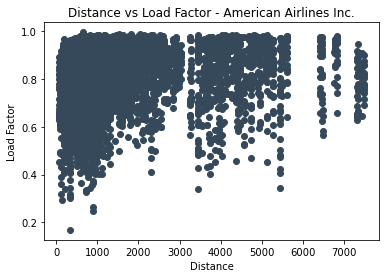

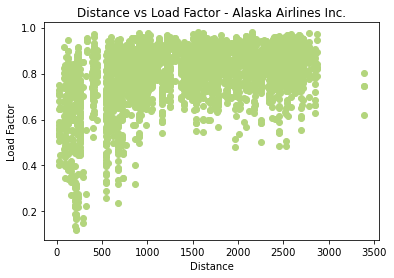

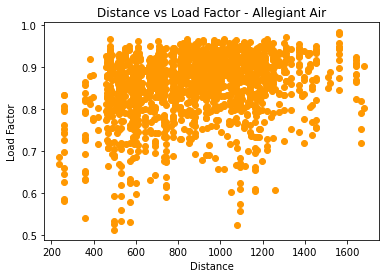

In [ ]:
for i in range(len(airline_datasets)):
    graph_dist_LF(i)